In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

## Q1 利用本周所学知识，将朝阳医院每月的销售数量和销售总额变化趋势通过一张图展示出来(双y轴)

In [2]:
df = pd.read_excel('朝阳医院2018年销售数据.xlsx')
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [7]:
df['购药日期'] = df['购药时间'].str.split(' ').str.get(0)

In [8]:
df = df[df['购药日期']!='2018-02-29']

In [9]:
df['购药日期'] = pd.to_datetime(df['购药时间'].str.split(' ').str.get(0), format='%Y-%m-%d')

In [10]:
df.set_index('购药日期', inplace=True)

In [11]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
购药日期,,,,,,,
2018-01-01,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
2018-01-02,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2018-01-06,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
2018-01-11,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
2018-01-15,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [12]:
df_month = df[['销售数量','应收金额']].resample(rule='1M').sum()
df_month.head()

,销售数量,应收金额
购药日期,,
2018-01-31,2518.0,53295.0
2018-02-28,1850.0,41907.7
2018-03-31,2224.0,45311.0
2018-04-30,3009.0,54249.5
2018-05-31,2214.0,50875.6


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


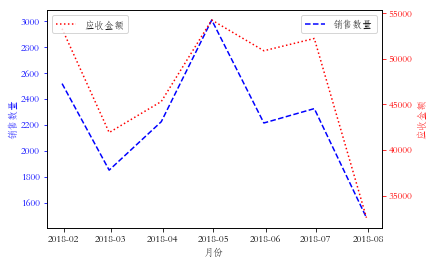

In [13]:
fig, ax1 = plt.subplots() #创建画图对象
ax1.plot(df_month.index,df_month['销售数量'],c='b',ls='--',label='销售数量')
ax1.legend(loc='upper right')
ax1.set_xlabel('月份',fontsize=10)
ax1.set_ylabel('销售数量',color='b')
ax1.tick_params('y',colors='b') #使坐标轴的和线条相匹配
ax2 = ax1.twinx() #使用子坐标
ax2.plot(df_month.index,df_month['应收金额'],c='r',ls=':',label='应收金额')
ax2.legend(loc='upper left')
ax2.set_xlabel('日期',fontsize=10)
ax2.set_ylabel('应收金额',color='r')
ax2.tick_params('y',colors='r') #使坐标轴的和线条相匹配
plt.show()

## Q2 利用本周所学的相关知识，将朝阳医院不同商品的销售数量进行汇总，然后展示出来。


**抱歉, 看起来 ggplot(又称ggpy)是一个官方不再维护的项目了, github上的最近一次提交还是三年前.** 

In [15]:
s1 = df.groupby('商品名称')['销售数量'].sum()
s1[:5]

商品名称
**盐酸阿罗洛尔片(阿尔马尔)    101.0
**阿替洛尔片             17.0
D厄贝沙坦氢氯噻嗪片(倍悦)       2.0
D替格瑞洛片              10.0
D盐酸贝尼地平片            33.0
Name: 销售数量, dtype: float64

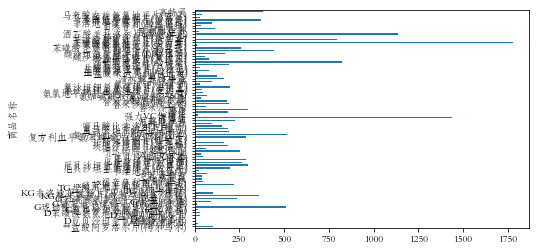

In [16]:
s1.plot(kind='barh')

## Q3 利用本周所学的相关知识，在creditcard_exp中，绘制不同edu_class下的 avg_exp和Income的关系图。

In [17]:
df = pd.read_csv('creditcard_exp.csv')
df.head(2)

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104168743,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.5,7.132098111,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2


In [20]:
df['edu_class'].unique()

array([3, 2, 1, 0])

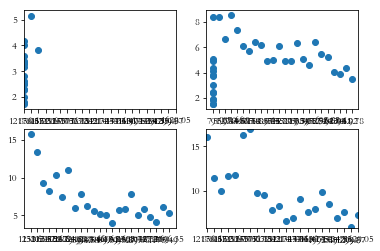

In [26]:
fig,ax = plt.subplots(2,2) #可以取'none','row','col','all'
ax1 = plt.subplot(221)
ax1.scatter(df.loc[df['edu_class']==0, 'avg_exp'], df.loc[df['edu_class']==0, 'Income'])
ax2= plt.subplot(222)
ax2.scatter(df.loc[df['edu_class']==1, 'avg_exp'], df.loc[df['edu_class']==1, 'Income'])
ax3 = plt.subplot(223)
ax3.scatter(df.loc[df['edu_class']==2, 'avg_exp'], df.loc[df['edu_class']==2, 'Income'])
ax4 =plt.subplot(224,sharex=ax1) #改sharey试试效果
ax4.scatter(df.loc[df['edu_class']==3, 'avg_exp'], df.loc[df['edu_class']==3, 'Income'])
plt.autoscale(enable=True,axis='both',tight=True) #调整坐标轴范围
plt.show()